# Ridge Regression

In ridge regression (also known as an l2 penalty). an additional term $\alpha \sum_{i=1}^n w_i^2$ is added to the cost function. So now instead of minimizing $J(w) = ||Xw-y||^2$, we now minimize $J(w) = ||Xw-y||^2 + \alpha \sum_{i=1}^n w_i^2$

Or.

$$J(w) = MSE(w) + \frac{\alpha}{2} \sum_{i=1}^n w_i^2$$

The $\frac{1}{2}$ doesn't really matter here. We just want a clean derivative.

**Lets look at its effects**

Adding this additional term to the cost function, imposes a penalty of on size of coefficients. If any particular weight happens to grow large then the cost function grows large. 

* $\alpha$ = tuning parameter (where $\alpha > 0$, otherwise there would be no regularization)
* $||w||^2_2$ = the magnitude of the weight vector, squared.

So all this is term is adding is a penalty on the size of _each_ weight. The larger a weight is, the exponentially larger the penalty - and the smaller the weight is, the exponentially smaller the penalty. We can also see that a preference for all weights to be small together is also preferred because any one weight that is high would otherwise affect the overall cost exponentially.

Another thing to notice is that the bias term is not regularized (i=1). Why might we want to avoid regularizing the bias term? The bias term is really just an offset for the model, and we want that to be able to begin from anywhere. It's a weight that was made up to begin with, and is differentiable from the weights associated from the features.

**Implementing Ridge Regression**

In practice, the cost function would change. Since the ridge regression regularization term is independent, we could simply append its derivative to the cost function of the model.

$$
\begin{align*}
    \frac{\partial}{\partial_w} (\frac{\alpha}{2} \sum_{i=1}^n w_i^2) = \\
    \frac{\partial}{\partial_w} (\frac{\alpha}{2}  (w_1^2 + w_2^2 + w_3^2 + \dots + w_n^2)) = \\
    \alpha (w_1 + w_2 + w_3 + \dots + w_n) = \\
    \alpha w = 
\end{align*}
$$

**Why are high weights bad? Why is this something we would like to avoid?**

Collinearity occurs when one predictor variable (or coefficient) in a regression model can be linearly predicted with the others with a substantial degree of accuracy, rendering the other variables almost useless.


## Example - Ridge Weights as a Function of Alpha

For example, we can observe how each weight varies as a function of alpha using boston housing prices dataset.

In [1]:
from sklearn import linear_model
from sklearn.datasets import load_boston


boston = load_boston()
X, y = boston.data, boston.target

In [31]:
from sklearn import linear_model
from sklearn.datasets import load_boston
from progressbar import ProgressBar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


w_by_alpha = []
bar = ProgressBar()
for a in bar(np.arange(10, .01, -.01)):
    reg = linear_model.Ridge(alpha=a)
    reg.fit(X, y)
    coef = [a] + [reg.intercept_] + list(reg.coef_)
    w_by_alpha.append(coef)

columns = ['a'] + [f'w_{i}' for i in range(X.shape[1], -1, -1)]
w_by_alpha_df = pd.DataFrame(w_by_alpha, columns=columns)
w_by_alpha_df.head(3)

100% (999 of 999) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


,a,w_13,w_12,w_11,w_10,w_9,w_8,w_7,w_6,w_5,w_4,w_3,w_2,w_1,w_0
0,10.00,27.467885,-0.101435,0.049579,-0.042962,1.952021,-2.371619,3.702272,-0.010707,-1.248808,0.279596,-0.013993,-0.797945,0.010037,-0.559366
1,9.99,27.467331,-0.101435,0.049578,-0.042955,1.952499,-2.373677,3.702501,-0.010708,-1.248840,0.279591,-0.013993,-0.797952,0.010037,-0.559346
2,9.98,27.466778,-0.101435,0.049576,-0.042947,1.952977,-2.375739,3.702729,-0.010708,-1.248872,0.279586,-0.013992,-0.797960,0.010037,-0.559325


Text(0.5, 1.0, 'Coefficient value change as a function of alpha - Ridge')

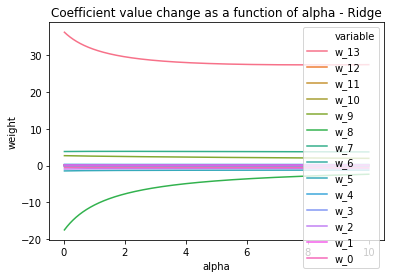

In [32]:
import seaborn as sns

w_by_alpha_df_melt = w_by_alpha_df.melt(id_vars=['a'])
sns.lineplot(x="a", y="value", hue="variable", data=w_by_alpha_df_melt)
plt.xlabel('alpha')
plt.ylabel('weight')
plt.title('Coefficient value change as a function of alpha - Ridge')

As alpha increases, the weights tend more and more towards zero because we've defined greater loss for higher weights. And when weights are smaller, this leads to a "flatter" and less "dramatic" curve. 

To demonstrate this: Consider the two functions with drastically different weights in magnitude:

$y(x) = \frac{cos(\pi x)}{x} - x^2 + x$

$y(x) = 100\frac{3cos(\pi x)}{x} - 100x^2 + 200x - 1000$

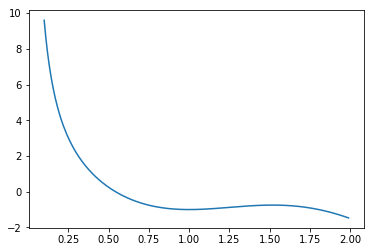

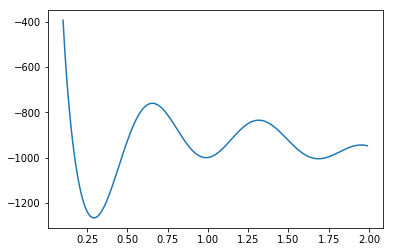

In [55]:
from math import pi
from myutils.draw.math import plt_2d_functions


plt_2d_functions([lambda x: np.cos(pi*x)/x - x**2 + x], np.arange(.1, 2, .01), title)
plt_2d_functions([lambda x: 100*np.cos(3*pi*x)/x - 100*x**2 + 200*x - 1000], np.arange(.1, 2, .01))

## Example - Tuning Alpha with RidgeCV

Alternatively, we can use `RidgeCV` which uses built cross validation to tune $\alpha$.

In [56]:
from sklearn import linear_model


reg = linear_model.RidgeCV(alphas=np.arange(0.1, 10, .001))
reg.fit(X, y)       
reg.alpha_

0.1

## Other 

```python
# to use a closed form solution solver
Ridge(alpha=1, solver="cholesky")

# ridge regression using gradient descent
SGDRegressor(penalty="l2")
```
